# Quantization as an Enabling Technology for Efficient Large Language Model Deployment

## I. The Computational Challenge of Hyperscale Foundation Models
### A. The Memory Wall: LLM Size and Hardware Requirements

The rapid rise of LLMs has led to exceptional advancements in natural language processing (NLP). Models such as BERT and LLaMA are extremely large, with parameters often reaching billions. The "Memory Wall" problem refers to the sheer volume of memory needed to store these parameters and perform inference, which can overwhelm typical computational infrastructures. This problem is exacerbated when deploying these models on edge devices or resource-constrained environments. Quantization addresses this issue by reducing model size, which alleviates the memory bottleneck and allows for faster computation through integer-based arithmetic.

### B. Operational Costs: Latency, Throughput, and Energy Consumption

With the increasing size of LLMs, latency and throughput are key operational challenges. High-end computational hardware required for inference results in high operational costs, particularly with power consumption and cooling. Quantization reduces both memory and power requirements, improving inference speed (by $2$–$4$ times) while also allowing the deployment of LLMs in consumer-grade devices and edge environments. Thus, quantization enables democratization of LLMs, reducing their dependency on massive cloud infrastructure and making them more widely accessible.

### C. The Necessity of Model Compression for Real-World Deployment

Model compression techniques such as pruning, knowledge distillation, and quantization have become essential for deploying LLMs in resource-constrained environments. Among these, quantization is particularly effective due to its simplicity and immediate impact on model size and computational efficiency.## I. The Computational Challenge of Hyperscale Foundation Models
### A. The Memory Wall: LLM Size and Hardware Requirements

The rapid rise of LLMs has led to exceptional advancements in natural language processing (NLP). Models such as BERT and LLaMA are extremely large, with parameters often reaching billions. The "Memory Wall" problem refers to the sheer volume of memory needed to store these parameters and perform inference, which can overwhelm typical computational infrastructures. This problem is exacerbated when deploying these models on edge devices or resource-constrained environments. Quantization addresses this issue by reducing model size, which alleviates the memory bottleneck and allows for faster computation through integer-based arithmetic.

### B. Operational Costs: Latency, Throughput, and Energy Consumption

With the increasing size of LLMs, latency and throughput are key operational challenges. High-end computational hardware required for inference results in high operational costs, particularly with power consumption and cooling. Quantization reduces both memory and power requirements, improving inference speed (by $2$–$4$ times) while also allowing the deployment of LLMs in consumer-grade devices and edge environments. Thus, quantization enables democratization of LLMs, reducing their dependency on massive cloud infrastructure and making them more widely accessible.

### C. The Necessity of Model Compression for Real-World Deployment

Model compression techniques such as pruning, knowledge distillation, and quantization have become essential for deploying LLMs in resource-constrained environments. Among these, quantization is particularly effective due to its simplicity and immediate impact on model size and computational efficiency.

## II. Quantization Fundamentals: Theory and Mathematical Derivation
### A. Defining Quantization: Mapping Float32 to Lower Bit-Widths

Quantization involves reducing the bit-width of the model parameters (e.g., from float32 to int8 or int4). This reduction leads to significant memory savings and computational efficiency. The Affine Quantization Scheme is commonly used, where the floating-point numbers are scaled and shifted to fit into a lower precision integer format.
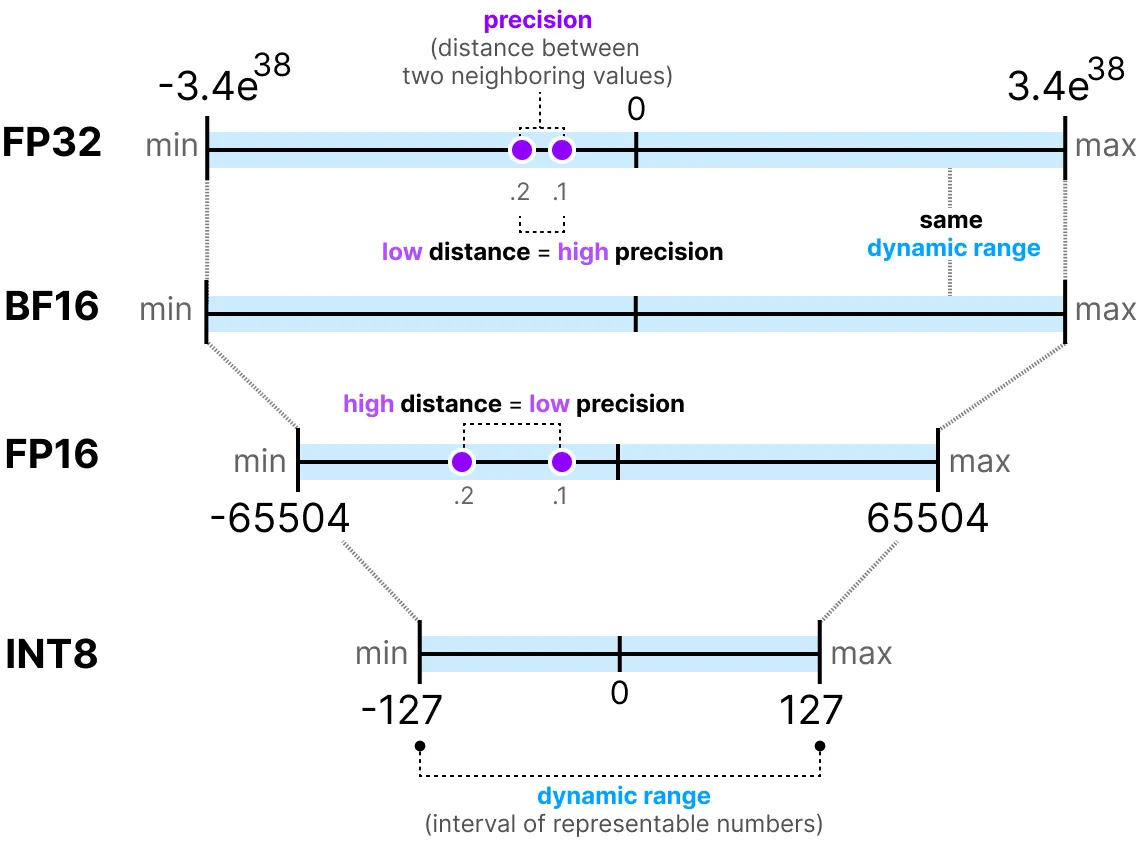

## III. Advanced k-bit Quantization Techniques for LLMs
### A. 8-bit Quantization (INT8)

INT8 quantization is one of the most widely used formats in deployment. It typically reduces model size by 50% with minimal loss in accuracy (around 1%). This makes it a highly efficient choice for production systems that require both stability and speed.

### B. 4-bit Quantization: The QLoRA Framework

4-bit quantization has seen substantial improvements with frameworks like QLoRA. This technique is designed to fine-tune large models with very low bit-width precision. The use of NF4 (Normal Float 4-bit) and Double Quantization provides highly efficient storage by focusing precision around the most significant weights (near zero), while minimizing distortion in regions that matter most.


## IV. Comparative Analysis of State-of-the-Art Quantization Formats

Several quantization formats have been developed, each optimized for different hardware and performance goals. A comparison of popular formats such as GPTQ, AWQ, and GGUF highlights their trade-offs between accuracy, latency, and portability.

## V. Engineering Quantized LLMs: Practical Implementation and Code Examples

Here are the key steps to implement k-bit quantization for LLMs, using the Hugging Face Transformers and PEFT (Parameter-Efficient Fine-Tuning) libraries, along with the bitsandbytes library.

### A. Integrating bitsandbytes and Hugging Face Ecosystem

In [6]:
# CODE BLOCK 1: Installation and Library Setup
!pip install -q transformers accelerate bitsandbytes peft torchao evaluate datasets

import torch
from transformers import AutoModelForCausalLM, BitsAndBytesConfig
from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model
print("Libraries imported successfully for QLoRA implementation.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00
Libraries imported successfully for QLoRA implementation.


###  B. Code Block 2: Configuring 4-bit Quantization (NF4 and Double Quantization)





In [2]:
# Setting up the BitsAndBytesConfig for 4-bit QLoRA
config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",  # Use Normal Float 4-bit
    bnb_4bit_use_double_quant=True,  # Apply nested quantization
    bnb_4bit_compute_dtype=torch.bfloat16  # Use bfloat16 for matrix multiplication
)
print(f"Quantization Configuration established: {config}")


Quantization Configuration established: BitsAndBytesConfig {
  "_load_in_4bit": true,
  "_load_in_8bit": false,
  "bnb_4bit_compute_dtype": "bfloat16",
  "bnb_4bit_quant_storage": "uint8",
  "bnb_4bit_quant_type": "nf4",
  "bnb_4bit_use_double_quant": true,
  "llm_int8_enable_fp32_cpu_offload": false,
  "llm_int8_has_fp16_weight": false,
  "llm_int8_skip_modules": null,
  "llm_int8_threshold": 6.0,
  "load_in_4bit": true,
  "load_in_8bit": false,
  "quant_method": "bitsandbytes"
}



### C. CODE BLOCK 3: Loading a Quantized LLM (e.g., Mistral 7B)

In [9]:
model_id = "mistralai/Mistral-7B-v0.1"
print(f"Loading {model_id} using 4-bit quantization...")

# Loading the model directly into 4-bit precision
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=config,
    device_map="auto"  # Automatically distribute model layers across available devices
)

# Outputting model size and device information (simulation)
print(f"Model loaded successfully. Estimated size reduction: ~75% (32GB -> 8GB theoretical for 7B model)")


Loading mistralai/Mistral-7B-v0.1 using 4-bit quantization...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model loaded successfully. Estimated size reduction: ~75% (32GB -> 8GB theoretical for 7B model)


### D. CODE BLOCK 4: Preparing a Quantized Model for Fine-Tuning (QLoRA)

In [5]:
# 1. Preprocess the quantized model for training
model = prepare_model_for_kbit_training(model)
print("Model prepared for k-bit training using prepare_model_for_kbit_training().")

# 2. Define LoRA Configuration
lora_config = LoraConfig(
    r=16,  # Rank of the update matrices
    lora_alpha=8,  # Scaling factor
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj"],
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

# 3. Create the PEFT Model
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()
print("PEFT model created, ready for efficient fine-tuning on consumer GPUs.")


Model prepared for k-bit training using prepare_model_for_kbit_training().


/usr/local/lib/python3.12/dist-packages/peft/mapping_func.py:73: UserWarning: You are trying to modify a model with PEFT for a second time. If you want to reload the model with a different config, make sure to call `.unload()` before.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/peft/tuners/tuners_utils.py:196: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


trainable params: 13,631,488 || all params: 7,255,363,584 || trainable%: 0.1879
PEFT model created, ready for efficient fine-tuning on consumer GPUs.


## VI. Performance Analysis, Trade-offs, and Future Work
### A. Quantization Return on Investment: Memory and Speed Benchmarks

Quantization yields significant performance gains, such as up to 50% reduction in memory usage and a 2-4x speedup in inference time.

### B. Addressing Accuracy Degradation and Non-Determinism

As the precision decreases (e.g., from INT8 to INT4), quantization can introduce accuracy degradation and non-determinism. Techniques like QAT (Quantization-Aware Training) and QLoRA can help mitigate these issues, but careful selection of quantization format is critical for tasks requiring high accuracy.

### C. Emerging Trends in Quantization Research

Emerging trends focus on dynamic calibration and EfficientQAT, which help reduce the trade-offs between accuracy and efficiency.



## VII. PTQ vs QAT — Concepts

**Post-Training Quantization (PTQ)**
- Quantize a fully trained model after training completes.
- No retraining required; fastest path to smaller models.
- Good for INT8 with minimal accuracy loss in many cases.

**Quantization-Aware Training (QAT)**
- Simulate quantization during training so the model learns to be robust to reduced numerical precision.
- Requires training data and compute but yields the best accuracy, especially at aggressive bit-widths (4-bit).

**QLoRA**: A recipe for fine-tuning LLMs in low-bit (4-bit NF4) using LoRA adapters and bitsandbytes. Effectively a lightweight QAT for very large models.


(https://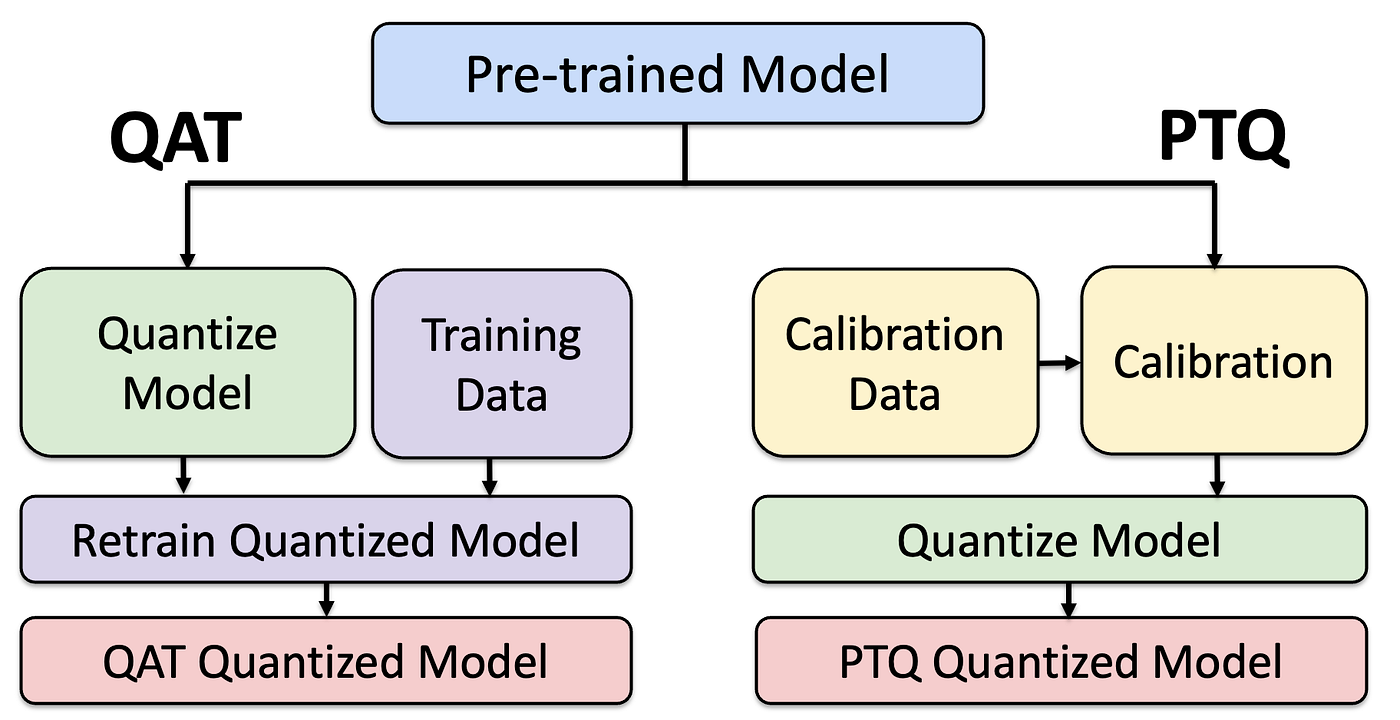)

In [8]:
# PTQ example: load DistilBERT in 8-bit with bitsandbytes (PTQ)
#
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, BitsAndBytesConfig

# model_id = 'distilbert-base-uncased'
model_id = 'bert-base-uncased' # Changed to a model known to work well with 8-bit quantization
print('Model chosen for PTQ demo:', model_id)

# BitsAndBytesConfig can request 8-bit loading
bnb_config = BitsAndBytesConfig(load_in_8bit=True)

print('Loading model in 8-bit (this will download weights — run where you have internet)')
model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map='auto'  # or 'cpu' if no GPU
)
tokenizer = AutoTokenizer.from_pretrained(model_id)

print('✅ Model loaded. Example inference below (inputs tokenized).')
text = 'This is a sample sentence for PTQ inference.'
inputs = tokenizer(text, return_tensors='pt')
with torch.no_grad():
    outputs = model(**{k:v.to(model.device) for k,v in inputs.items()})
    logits = outputs.logits
print('Logits:', logits.cpu().numpy())

Model chosen for PTQ demo: bert-base-uncased
Loading model in 8-bit (this will download weights — run where you have internet)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

✅ Model loaded. Example inference below (inputs tokenized).
Logits: [[0.4731 0.3457]]


## VII. Conclusions and Recommendations

Quantization, including PTQ, INT8 and INT4 methods, is a key technology for scaling LLMs to real-world applications, particularly in edge devices and resource-constrained environments. By carefully balancing size reduction, accuracy loss, and latency, quantization allows LLMs to be deployed more efficiently and broadly. PTQ offers a fast path for model compression, while INT8 and INT4 with techniques like QLoRA provide further efficiency gains with manageable accuracy trade-offs.